In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Cleaned_Customer_churn.csv")
df.head()

,user_id,apm,income,height,reaction_time,age,kappa_ability,weight,amount,gregariousness,favorite_pizza_topping_Not_NA,grade_Not_NA,city_Not_NA,favorite_ice_cream_flavor_Not_NA,company_Not_NA,account_verified,product_use,product_visit,churn
0,78389,154,100,176,353,47,6291,149,10,48,Pineapple,Z,A-town,Red Velvet,Pause Associates,0,23,91,0
1,79235,193,95,182,250,20,4765,-234,19,62,Ham,Y,C-borough,Red Velvet,Go LLC,7,35,44,0
2,78816,180,97,177,311,67,4360,145,41,57,Pineapple,Z,A-town,Strawberry,Pause Associates,0,0,81,0
3,78961,168,99,184,320,48,3663,148,105,43,Black olives,Z,A-town,Peach,Pause Associates,0,0,83,0
4,78427,207,105,999,329,35,149,146,53,58,Red peppers,X,A-town,Red Velvet,Pause Associates,0,28,20,0


# Checking for Outliers

In [3]:
columns = ['apm','income','height','reaction_time','age','weight','gregariousness']

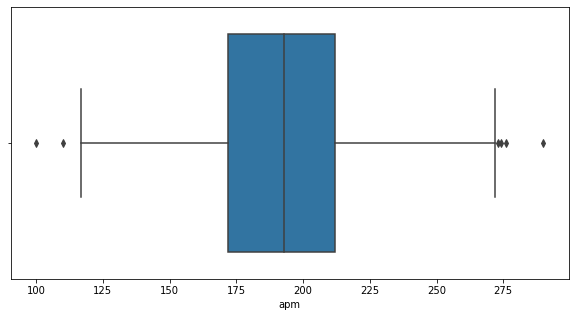

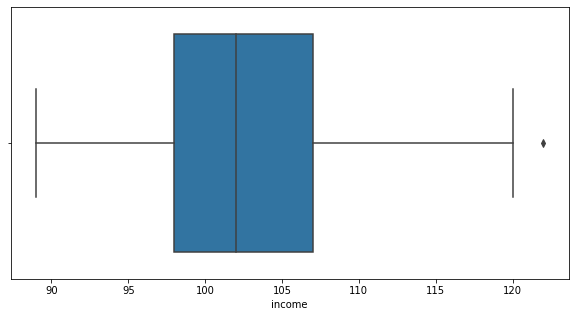

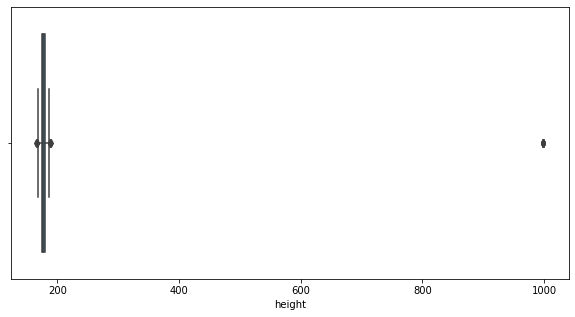

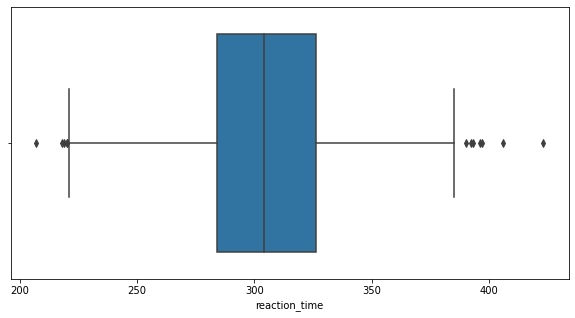

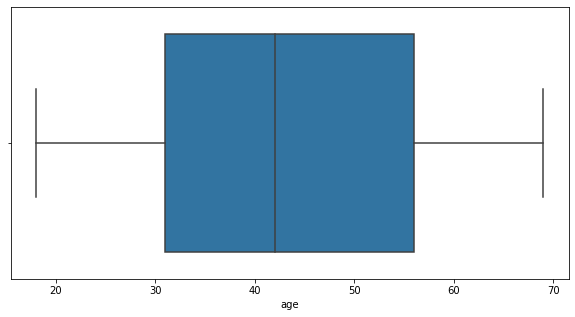

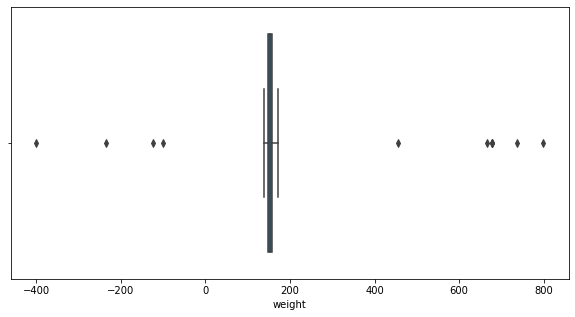

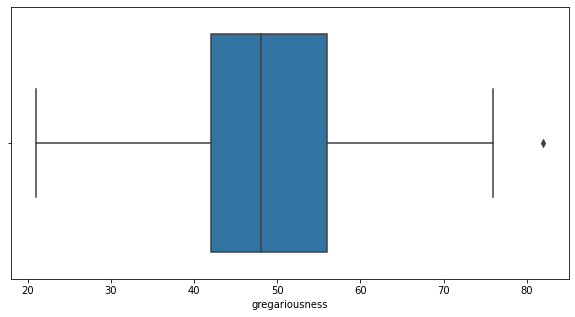

In [4]:
for i in range(0,len(columns)):
    fig = plt.figure(figsize=(10,5))
    sns.boxplot(x=df[columns[i]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

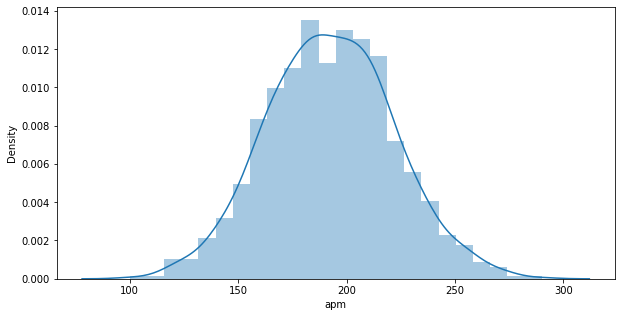

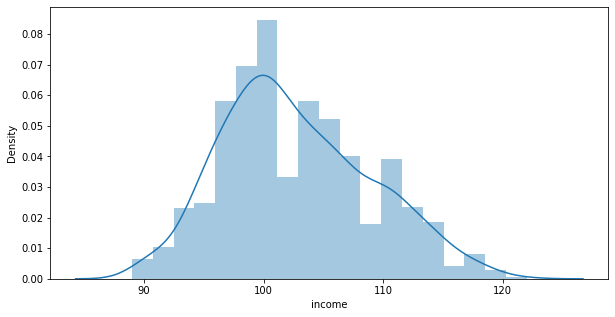

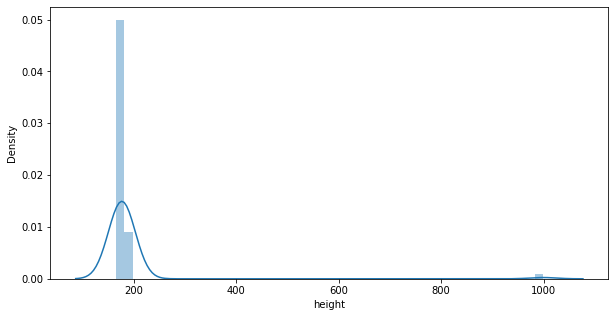

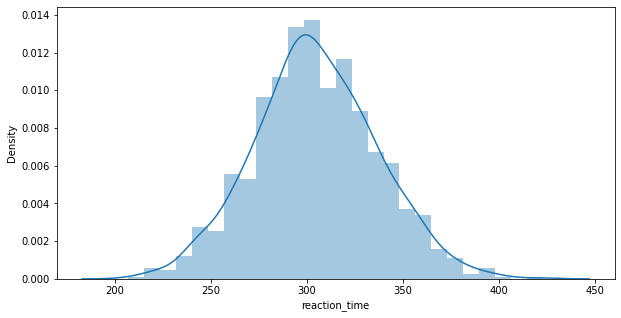

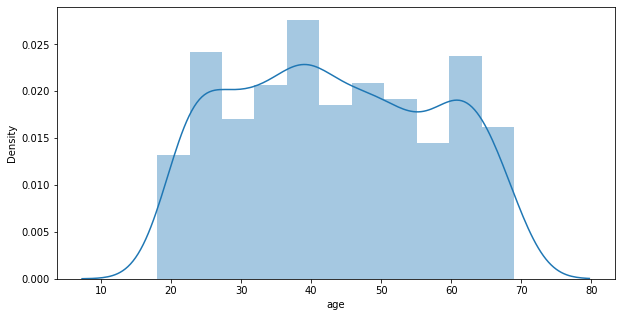

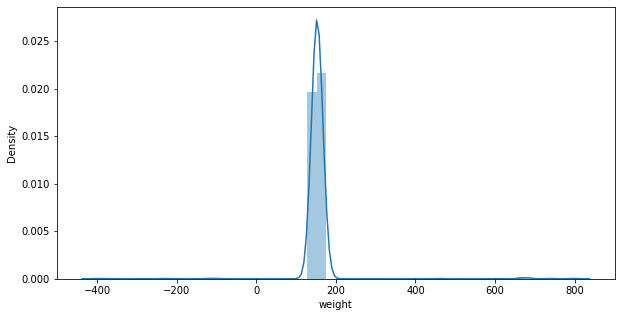

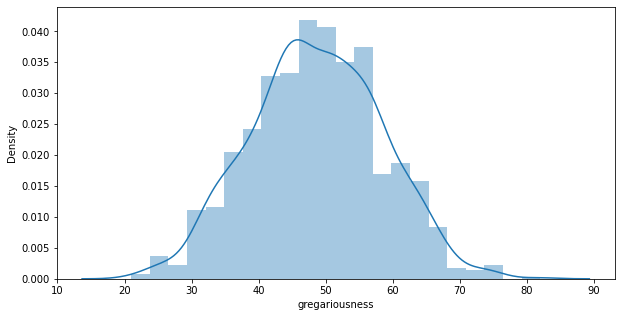

In [5]:
for i in range(0,len(columns)):
    fig = plt.figure(figsize=(10,5))
    sns.distplot(df[columns[i]])

# For Gaussian Distribution we will calculate the boundaries which differentiates the outliers

In [6]:
columns = ['apm','reaction_time','weight']

In [7]:
for i in df[columns]:
    upper_boundary = df[i].mean() + 3* df[i].std()
    lower_boundary = df[i].mean() - 3* df[i].std()
    mean_val = df[i].mean()
    print(i,'; lower bound',lower_boundary,'; upper bound',upper_boundary,'; mean',mean_val)
    df.loc[df[i]>=upper_boundary,i]=mean_val
    df.loc[df[i]<=lower_boundary,i]=mean_val
    print('--------------------------------------------------------------------------------------------------')

apm ; lower bound 104.84855331621807 ; upper bound 280.1594466837819 ; mean 192.504
--------------------------------------------------------------------------------------------------
reaction_time ; lower bound 208.54405547638484 ; upper bound 400.8139445236151 ; mean 304.679
--------------------------------------------------------------------------------------------------
weight ; lower bound 2.9215514315525297 ; upper bound 307.55444856844747 ; mean 155.238
--------------------------------------------------------------------------------------------------


# If features are Skewed, we use IQR technique¶

In [8]:
columns = ['income','height','gregariousness']

In [9]:
for i in df[columns]:
    quantile1, quantile3= np.percentile(df[i],[25,75])
    iqr_value=quantile3-quantile1
    print(i,'; quantile1',quantile1,'; quantile3',quantile3,'; IQR',iqr_value)
    lower_bound_val = quantile1 -(1.7 * iqr_value)
    upper_bound_val = quantile3 +(1.7 * iqr_value)
    df.loc[df[i]>=upper_bound_val,i]=df[i].mean()
    df.loc[df[i]<=lower_bound_val,i]=df[i].mean()
    print('--------------------------------------------------------------------------------------------------')

income ; quantile1 98.0 ; quantile3 107.0 ; IQR 9.0
--------------------------------------------------------------------------------------------------
height ; quantile1 175.0 ; quantile3 180.0 ; IQR 5.0
--------------------------------------------------------------------------------------------------
gregariousness ; quantile1 42.0 ; quantile3 56.0 ; IQR 14.0
--------------------------------------------------------------------------------------------------


# Performing Chi-Squared test for independence for categorical features

**Null Hypothesis H0:** There is **no** relationship between 2 categorical features

**Alternate Hypothesis H:** There is a relationship between 2 categorical features

In [10]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [11]:
columns = ['favorite_pizza_topping_Not_NA','grade_Not_NA','city_Not_NA','favorite_ice_cream_flavor_Not_NA','company_Not_NA']

In [12]:
alpha = 0.05
for feature in df[columns]:
    myCrosstab = pd.crosstab(df[feature], df['churn'])
    chiVal, pVal, degree, exp = chi2_contingency(myCrosstab)
    print('chi-square statistic :',chiVal,'p-value :', pVal,'degree of fredom :',degree,'Expected Values :',exp)
    if pVal<=alpha:
        print("For",feature,": Rejecting H0, There is a relationship between 2 categorical features")
    else:
        print("For",feature,": Failing to Reject H0, There is no relationship between 2 categorical features")
    print('------------------------------------------------------------------------------------------------------')

chi-square statistic : 299.47901499888997 p-value : 6.163167136594287e-53 degree of fredom : 18 Expected Values : [[31.49 15.51]
 [42.21 20.79]
 [14.74  7.26]
 [25.46 12.54]
 [12.73  6.27]
 [70.35 34.65]
 [ 9.38  4.62]
 [ 6.03  2.97]
 [65.66 32.34]
 [26.13 12.87]
 [25.46 12.54]
 [ 5.36  2.64]
 [38.19 18.81]
 [81.07 39.93]
 [56.28 27.72]
 [16.75  8.25]
 [59.63 29.37]
 [48.91 24.09]
 [34.17 16.83]]
For favorite_pizza_topping_Not_NA : Rejecting H0, There is a relationship between 2 categorical features
------------------------------------------------------------------------------------------------------
chi-square statistic : 101.1398192720486 p-value : 1.0908556735133941e-22 degree of fredom : 2 Expected Values : [[ 71.69  35.31]
 [280.06 137.94]
 [318.25 156.75]]
For grade_Not_NA : Rejecting H0, There is a relationship between 2 categorical features
------------------------------------------------------------------------------------------------------
chi-square statistic : 60.5979034326

# Performing t-test on numeric features

**Null Hypothesis H0:** There is **no** relationship between 2 features

**Alternate Hypothesis H:** There is a relationship between 2 features

In [13]:
from scipy.stats import ttest_ind

In [14]:
columns = ['apm','income','height','reaction_time','age','kappa_ability','weight','amount','gregariousness']

In [15]:
for feature in df[columns]:
    t_value,p_value = stats.ttest_ind(df[feature], df['churn'], equal_var=True)
    print('t-statistic :',t_value,'p-value :',p_value)
    if p_value<=alpha:
        print("For",feature,"Rejecting H0, There is a relationship between 2 features")
    else:
        print("For",feature,"Failing to Reject H0, There is no relationship between 2 features")
    print('-----------------------------------------------------------------------------------------')

t-statistic : 210.19213310513334 p-value : 0.0
For apm Rejecting H0, There is a relationship between 2 features
-----------------------------------------------------------------------------------------
t-statistic : 517.0987610818079 p-value : 0.0
For income Rejecting H0, There is a relationship between 2 features
-----------------------------------------------------------------------------------------
t-statistic : 1290.9151987974203 p-value : 0.0
For height Rejecting H0, There is a relationship between 2 features
-----------------------------------------------------------------------------------------
t-statistic : 305.25957782265664 p-value : 0.0
For reaction_time Rejecting H0, There is a relationship between 2 features
-----------------------------------------------------------------------------------------
t-statistic : 95.95307268328571 p-value : 0.0
For age Rejecting H0, There is a relationship between 2 features
------------------------------------------------------------------

# Handling Categorical features

Ordinal Encoding for grade_Not_NA

In [16]:
dictionary={'X':1,'Y':2,'Z':3}

In [17]:
df['grade_ordinal'] = df['grade_Not_NA'].map(dictionary)

In [18]:
df.drop(columns=['grade_Not_NA'], axis=1, inplace=True)

In [19]:
df.head()

,user_id,apm,income,height,reaction_time,age,kappa_ability,weight,amount,gregariousness,favorite_pizza_topping_Not_NA,city_Not_NA,favorite_ice_cream_flavor_Not_NA,company_Not_NA,account_verified,product_use,product_visit,churn,grade_ordinal
0,78389,154.0,100.0,176.000,353.0,47,6291,149.000,10,48.0,Pineapple,A-town,Red Velvet,Pause Associates,0,23,91,0,3
1,79235,193.0,95.0,182.000,250.0,20,4765,155.238,19,62.0,Ham,C-borough,Red Velvet,Go LLC,7,35,44,0,2
2,78816,180.0,97.0,177.000,311.0,67,4360,145.000,41,57.0,Pineapple,A-town,Strawberry,Pause Associates,0,0,81,0,3
3,78961,168.0,99.0,184.000,320.0,48,3663,148.000,105,43.0,Black olives,A-town,Peach,Pause Associates,0,0,83,0,3
4,78427,207.0,105.0,190.382,329.0,35,149,146.000,53,58.0,Red peppers,A-town,Red Velvet,Pause Associates,0,28,20,0,1


LabelEncoding 

In [20]:
df_label = df.copy()

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [22]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [23]:
df_label = MultiColumnLabelEncoder(columns = ['favorite_pizza_topping_Not_NA','city_Not_NA','favorite_ice_cream_flavor_Not_NA','company_Not_NA']).fit_transform(df_label)

In [24]:
df_label.head()

,user_id,apm,income,height,reaction_time,age,kappa_ability,weight,amount,gregariousness,favorite_pizza_topping_Not_NA,city_Not_NA,favorite_ice_cream_flavor_Not_NA,company_Not_NA,account_verified,product_use,product_visit,churn,grade_ordinal
0,78389,154.0,100.0,176.000,353.0,47,6291,149.000,10,48.0,13,0,11,1,0,23,91,0,3
1,79235,193.0,95.0,182.000,250.0,20,4765,155.238,19,62.0,8,2,11,0,7,35,44,0,2
2,78816,180.0,97.0,177.000,311.0,67,4360,145.000,41,57.0,13,0,13,1,0,0,81,0,3
3,78961,168.0,99.0,184.000,320.0,48,3663,148.000,105,43.0,3,0,9,1,0,0,83,0,3
4,78427,207.0,105.0,190.382,329.0,35,149,146.000,53,58.0,14,0,11,1,0,28,20,0,1


One Hot Encoding for city, company, favorite_pizza_topping and favorite_ice_cream_flavor

In [25]:
df_oneHot = df.copy()

In [26]:
def category_onehot_multcols(multcolumns):
    df_final=df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(df[fields],drop_first=True)
        
        df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([df,df_final],axis=1)
        
    return df_final

In [27]:
columns=['favorite_pizza_topping_Not_NA','city_Not_NA','favorite_ice_cream_flavor_Not_NA','company_Not_NA']

In [28]:
df_oneHot = category_onehot_multcols(columns)

favorite_pizza_topping_Not_NA
city_Not_NA
favorite_ice_cream_flavor_Not_NA
company_Not_NA


In [29]:
df_oneHot.shape

(1000, 51)

In [30]:
df_oneHot =df_oneHot.loc[:,~df_oneHot.columns.duplicated()]
df_oneHot.shape

(1000, 51)

# Feature selection

Checking for highly correlated features with target

In [31]:
df_corr = df_label.copy()

In [32]:
abs(df_corr.corr()['churn']).sort_values(ascending=False)

churn                               1.000000
weight                              0.771182
income                              0.749150
company_Not_NA                      0.296903
grade_ordinal                       0.294183
apm                                 0.287297
reaction_time                       0.264991
favorite_ice_cream_flavor_Not_NA    0.168701
gregariousness                      0.162201
height                              0.126689
kappa_ability                       0.054176
amount                              0.053815
account_verified                    0.045079
favorite_pizza_topping_Not_NA       0.036305
age                                 0.036268
city_Not_NA                         0.033967
product_visit                       0.030304
product_use                         0.021732
user_id                             0.021711
Name: churn, dtype: float64

Feature importance with Random forest

In [33]:
df_fs = df_label.copy()

In [34]:
X = df_fs.drop(['churn'], axis=1)
y = df_fs['churn']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [37]:
feature_names = [f'feature {i}' for i in range(X.shape[1])]
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
dict(reversed(sorted(zip(rf.feature_importances_, X.columns.values))))

{0.3577913387864: 'weight',
 0.3428432122679986: 'income',
 0.04217889317750471: 'apm',
 0.03986886813508089: 'reaction_time',
 0.02372121789124363: 'favorite_pizza_topping_Not_NA',
 0.022977625981506156: 'gregariousness',
 0.022776487207298322: 'grade_ordinal',
 0.018324769870362877: 'company_Not_NA',
 0.017777436172283723: 'favorite_ice_cream_flavor_Not_NA',
 0.017005644992322804: 'user_id',
 0.016710164856931196: 'kappa_ability',
 0.016440180594305933: 'amount',
 0.015523513483556085: 'product_visit',
 0.01551073517912069: 'age',
 0.01507614113834814: 'height',
 0.0063993603493515926: 'product_use',
 0.004814901722145716: 'account_verified',
 0.004259508194239021: 'city_Not_NA'}

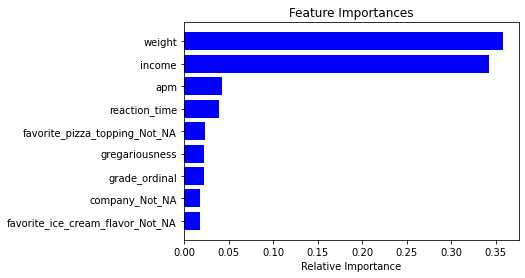

In [39]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [40]:
df_oneHot.to_csv('Modelling_Customer_churn.csv', encoding='utf-8', index=False)